In [26]:
import sys
import hmap
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt

# Create a random dataset for clustering

In [40]:
cell1_df = pnd.DataFrame(np.random.randn(50, 50)*5, 
                            index = [ "var"+str(i) for i in range(50)], 
                            columns = [ "sample"+str(i) for i in range(50)])

cell2_df = pnd.DataFrame(np.random.randn(50, 50)*5+5, 
                            index = [ "var"+str(i) for i in range(50)], 
                            columns = [ "sample"+str(i) for i in range(50, 100)])

cell3_df = pnd.DataFrame(np.random.randn(50, 50)*5+5, 
                            index = [ "var"+str(i) for i in range(50, 100)], 
                            columns = [ "sample"+str(i) for i in range(50)])

cell4_df = pnd.DataFrame(np.random.randn(50, 50)*5, 
                            index = [ "var"+str(i) for i in range(50, 100)], 
                            columns = [ "sample"+str(i) for i in range(50, 100)])

data_matrix_df = cell1_df.join(cell2_df).append(cell3_df.join(cell4_df))

# Create some row (Variables), and column (samples) annotation

In [52]:
row_annotation_df = pnd.DataFrame(np.array(["low"]*50+["high"]*50), 
                                  index = data_matrix_df.index,
                                  columns = ["DA.RESULTS"])

column_annotation_df = pnd.DataFrame(np.array(["case"]*50+["control"]*50),
                                  index = data_matrix_df.columns,
                                  columns = ["SAMPLE.GROUPING"])

# Create color codes for categorial variables

In [78]:
color_dict = {"DA.RESULTS": {"low": "b",
                             "high": "r"},
              "SAMPLE.GROUPING": {"case": "orange",
                                  "control": "green"}}

# Plot clustered heatmap

/data/analysis/covid-19_methyl-seq/environments/covid19_methylSeq/lib/python3.8/site-packages/hmap/plot/basic.py:575: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  p = legend.get_window_extent().inverse_transformed(ax.transAxes)


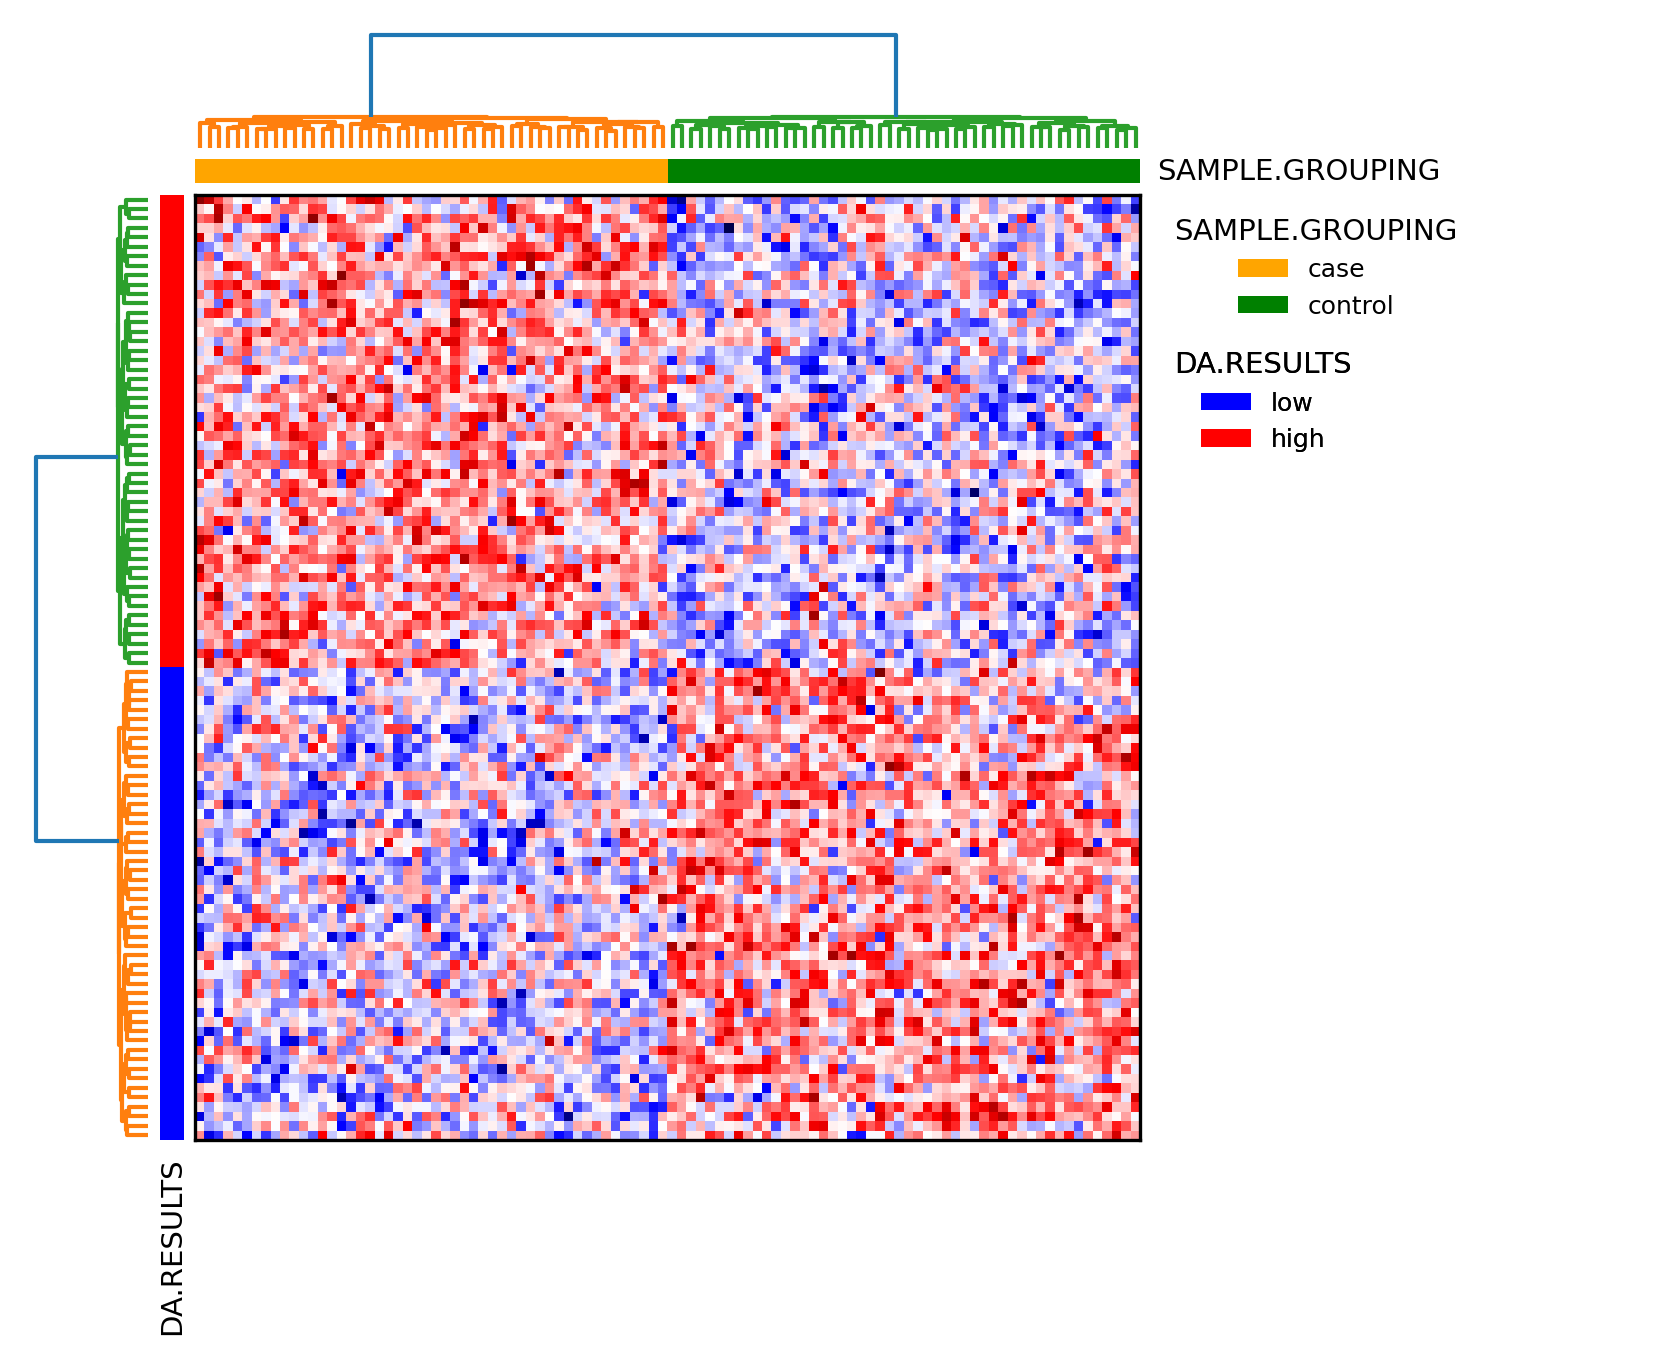

In [89]:
# Create layout for figure
fig, gs = hmap.layout.layout.layoutGrid(3, 4, [10., 2., 80., 40.], [10., 2., 80.], 1., 1., 15., 15., 15., 15.)

# Determine distancemetric and linkage method used for hierarchical clustering
distance_metric = "euclidean"
linkage_method = "ward"

# Plot heatmap
ax = plt.subplot(gs[2, 2])
r_heat = hmap.plot.basic.Heatmap(data_matrix_df,
                                cmap = "seismic",
                                linkage_method = linkage_method,
                                distance_metric = distance_metric,
                                ax = ax)

# Plot column clustering dendrogram
ax = plt.subplot(gs[0, 2])
r_col_den = hmap.plot.basic.Dendrogram(data_matrix_df,
                                       distance_metric=distance_metric,
                                       linkage_method=linkage_method,
                                       axis = 1,
                                       n_clust = 2,
                                       ax = ax)

# Plot row clustering dendrogram
ax = plt.subplot(gs[2, 0])
r_row_den = hmap.plot.basic.Dendrogram(data_matrix_df,
                                       distance_metric=distance_metric,
                                       linkage_method=linkage_method,
                                       axis = 0,
                                       n_clust = 2,
                                       ax = ax)

# Plot column annotation
ax = plt.subplot(gs[1, 2])
column_ids_reordered = r_heat[0]
r_col_anno_sample_grouping = hmap.plot.basic.Annotation(column_ids_reordered,
                                                        column_annotation_df,
                                                        "SAMPLE.GROUPING",
                                                        color_list=hmap.plot.basic.colors["set22"],
                                                        axis = 1,
                                                        is_categorial = True,
                                                        color_dict=color_dict["SAMPLE.GROUPING"],
                                                        ax = ax)

# Plot row annotation
ax = plt.subplot(gs[2, 1])
row_ids_reordered = r_heat[1]
r_row_anno_sample_grouping = hmap.plot.basic.Annotation(row_ids_reordered,
                                                        row_annotation_df,
                                                        "DA.RESULTS",
                                                        color_list=hmap.plot.basic.colors["xkcd"],
                                                        axis = 0,
                                                        is_categorial = True,
                                                        color_dict=color_dict["DA.RESULTS"],
                                                        ax = ax)

# Plot Legends
ax = plt.subplot(gs[2, 3])
patch_list_dict = {"SAMPLE.GROUPING": r_col_anno_sample_grouping,
                   "DA.RESULTS": r_row_anno_sample_grouping}
hmap.plot.basic.Legends(patch_list_dict,
                        ax = ax)

plt.savefig("pics/clustered_heatmap.jpeg")

# Plot clustered heatmap separated using prior knowledge

/data/analysis/covid-19_methyl-seq/environments/covid19_methylSeq/lib/python3.8/site-packages/hmap/plot/basic.py:575: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  p = legend.get_window_extent().inverse_transformed(ax.transAxes)


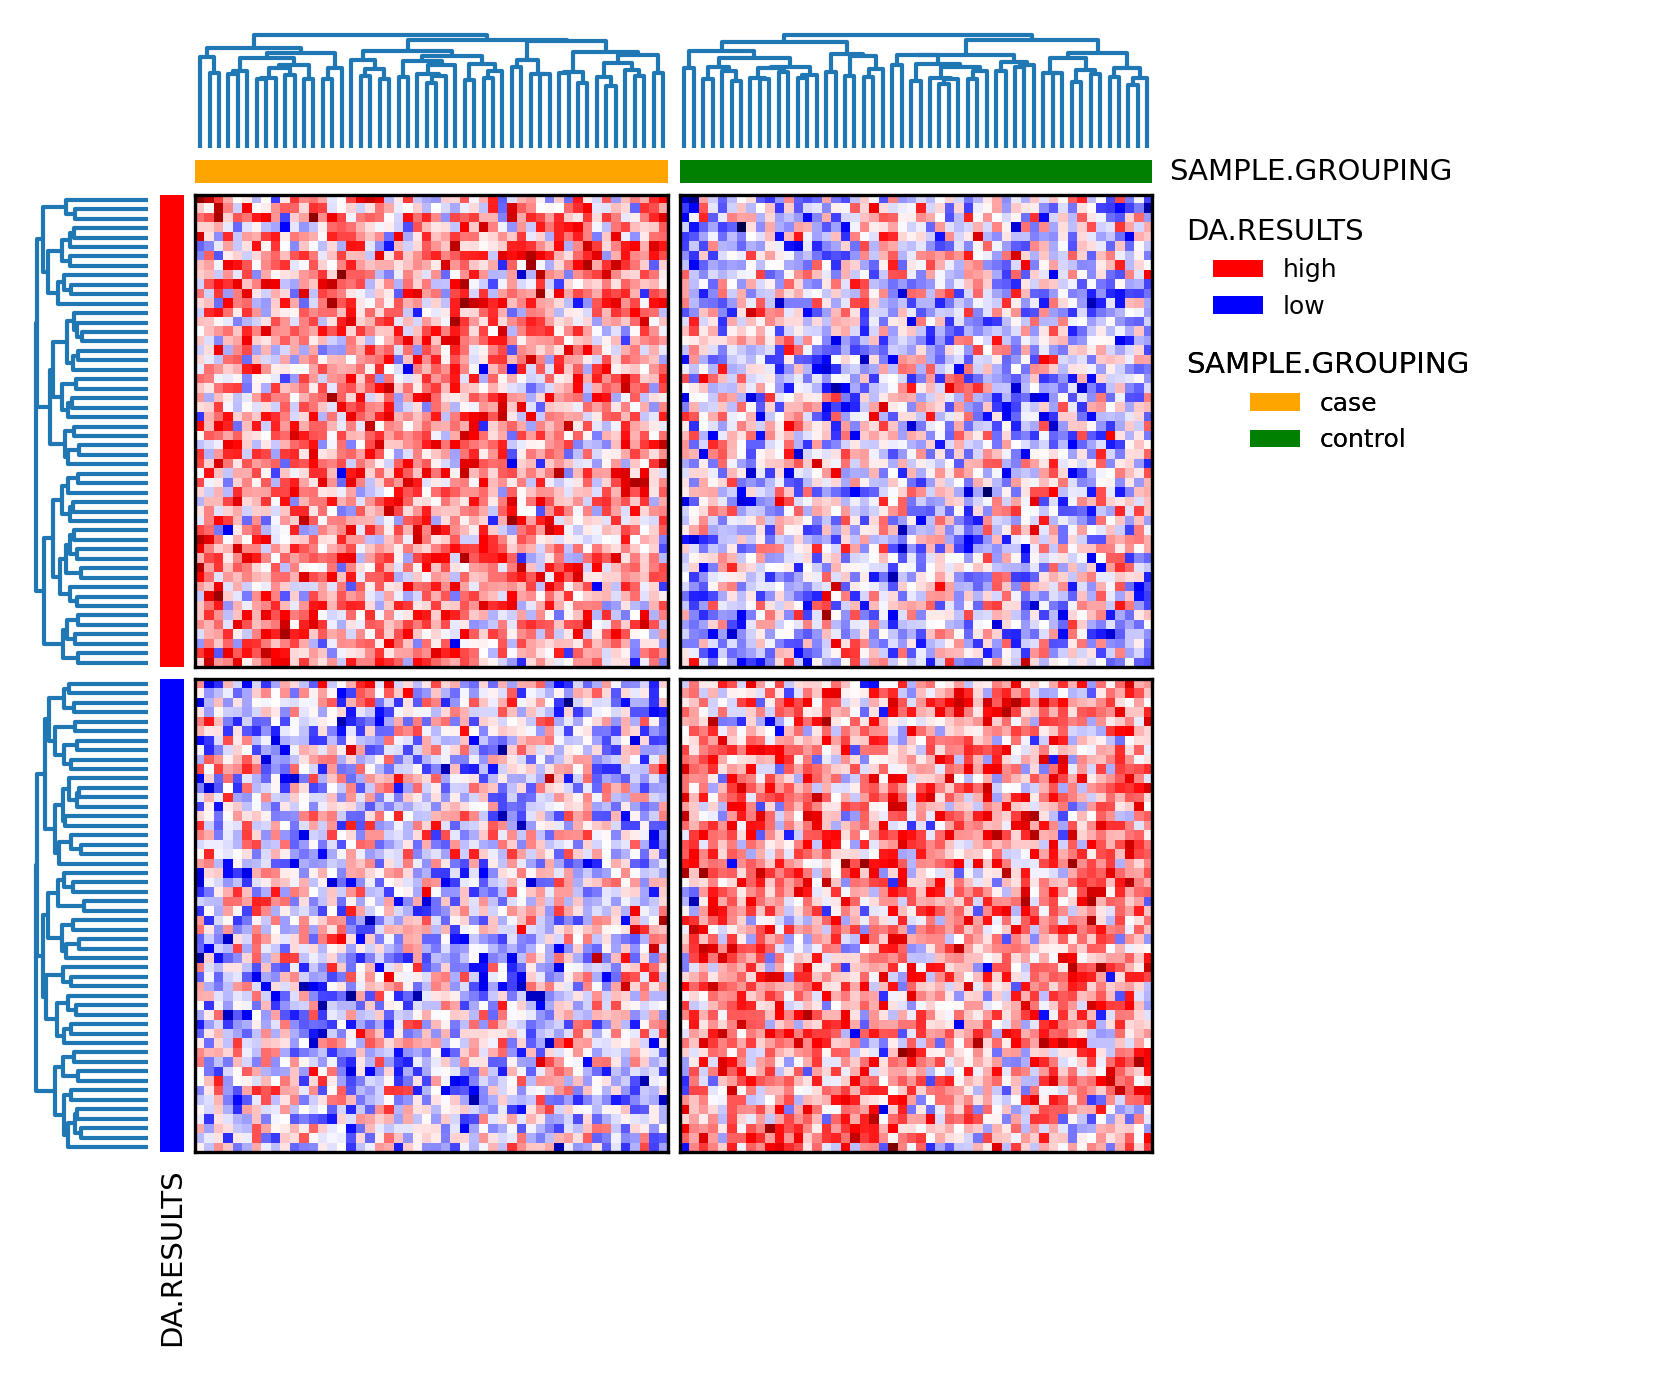

In [88]:
# Create layout for figure
fig, gs = hmap.layout.layout.layoutGrid(4, 5, [10., 2., 40., 40., 40], [10., 2., 40., 40.], 1., 1., 20., 15., 15., 20.)

# Determine distancemetric and linkage method used for hierarchical clustering
distance_metric = "euclidean"
linkage_method = "ward"

var_ids_low = row_annotation_df[row_annotation_df["DA.RESULTS"] == "low"].index
var_ids_high = row_annotation_df[row_annotation_df["DA.RESULTS"] == "high"].index
sample_ids_case = column_annotation_df[column_annotation_df["SAMPLE.GROUPING"] == "case"].index
sample_ids_control = column_annotation_df[column_annotation_df["SAMPLE.GROUPING"] == "control"].index

min_val = np.min(np.min(data_matrix_df))
max_val = np.max(np.max(data_matrix_df))

# Determine row orderings for high variables
r_heat_high = hmap.plot.basic.Heatmap(data_matrix_df.loc[var_ids_high, :],
                                      linkage_method = linkage_method,
                                      distance_metric = distance_metric,
                                      show_plot=False)
row_ids_high_sorted = r_heat_high[1]

# Determine row orderings for high variables
r_heat_low = hmap.plot.basic.Heatmap(data_matrix_df.loc[var_ids_low, :],
                                      linkage_method = linkage_method,
                                      distance_metric = distance_metric,
                                      show_plot=False)
row_ids_low_sorted = r_heat_low[1]

# Determine row orderings for case samples
r_heat_case = hmap.plot.basic.Heatmap(data_matrix_df.loc[:, sample_ids_case],
                                      linkage_method = linkage_method,
                                      distance_metric = distance_metric,
                                      show_plot=False)
col_ids_case_sorted = r_heat_case[0]

# Determine row orderings for control samples
r_heat_control = hmap.plot.basic.Heatmap(data_matrix_df.loc[:, sample_ids_control],
                                      linkage_method = linkage_method,
                                      distance_metric = distance_metric,
                                      show_plot=False)
col_ids_control_sorted = r_heat_control[0]

# Plot heatmap for SAMPLE.GROUP == case & DA.RESULTS == high
data_matrix_case_high_df = data_matrix_df.loc[var_ids_high, sample_ids_case]
ax = plt.subplot(gs[2, 2])
r_heat_case_high = hmap.plot.basic.Heatmap(data_matrix_case_high_df,
                        cmap = "seismic",
                        linkage_method = linkage_method,
                        distance_metric = distance_metric,
                        vmin = min_val,
                        vmax = max_val,
                        row_clustering=False,
                        column_clustering=False,
                        custom_row_clustering=row_ids_high_sorted,
                        custom_column_clustering=col_ids_case_sorted,
                        ax = ax)

# Plot heatmap for SAMPLE.GROUP == control & DA.RESULTS == high
data_matrix_control_high_df = data_matrix_df.loc[var_ids_high, sample_ids_control]
ax = plt.subplot(gs[2, 3])
r_heat_control_high = hmap.plot.basic.Heatmap(data_matrix_control_high_df,
                        cmap = "seismic",
                        linkage_method = linkage_method,
                        distance_metric = distance_metric,
                        vmin = min_val,
                        vmax = max_val,
                        row_clustering=False,
                        column_clustering=False,
                        custom_row_clustering=row_ids_high_sorted,
                        custom_column_clustering=col_ids_control_sorted,
                        ax = ax)

# Plot heatmap for SAMPLE.GROUP == case & DA.RESULTS == low
data_matrix_case_low_df = data_matrix_df.loc[var_ids_low, sample_ids_case]
ax = plt.subplot(gs[3, 2])
r_heat_case_low = hmap.plot.basic.Heatmap(data_matrix_case_low_df,
                        cmap = "seismic",
                        linkage_method = linkage_method,
                        distance_metric = distance_metric,
                        vmin = min_val,
                        vmax = max_val,
                        row_clustering=False,
                        column_clustering=False,
                        custom_row_clustering=row_ids_low_sorted,
                        custom_column_clustering=col_ids_case_sorted,
                        ax = ax)

# Plot heatmap for SAMPLE.GROUP == control & DA.RESULTS == low
data_matrix_control_low_df = data_matrix_df.loc[var_ids_low, sample_ids_control]
ax = plt.subplot(gs[3, 3])
r_heat_control_low = hmap.plot.basic.Heatmap(data_matrix_control_low_df,
                        cmap = "seismic",
                        linkage_method = linkage_method,
                        distance_metric = distance_metric,
                        vmin = min_val,
                        vmax = max_val,
                        row_clustering=False,
                        column_clustering=False,
                        custom_row_clustering=row_ids_low_sorted,
                        custom_column_clustering=col_ids_control_sorted,
                        ax = ax)

# Plot row Dendrogram high
ax = plt.subplot(gs[2, 0])
r_den_high = hmap.plot.basic.Dendrogram(data_matrix_df.loc[var_ids_high, :],
                                        linkage_method=linkage_method,
                                        distance_metric=distance_metric,
                                        axis = 0)

# Plot row Dendrogram low
ax = plt.subplot(gs[3, 0])
r_den_low = hmap.plot.basic.Dendrogram(data_matrix_df.loc[var_ids_low, :],
                                        linkage_method=linkage_method,
                                        distance_metric=distance_metric,
                                        axis = 0)

# Plot col Dendrogram case
ax = plt.subplot(gs[0, 2])
r_den_case = hmap.plot.basic.Dendrogram(data_matrix_df.loc[:, sample_ids_case],
                                        linkage_method=linkage_method,
                                        distance_metric=distance_metric,
                                        axis = 1)

# Plot col Dendrogram control
ax = plt.subplot(gs[0, 3])
r_den_case = hmap.plot.basic.Dendrogram(data_matrix_df.loc[:, sample_ids_control],
                                        linkage_method=linkage_method,
                                        distance_metric=distance_metric,
                                        axis = 1)

# Plot Annotation high
ax = plt.subplot(gs[2, 1])
r_anno_high = hmap.plot.basic.Annotation(r_heat_high[1],
                               row_annotation_df,
                               "DA.RESULTS",
                               axis = 0,
                               color_dict = color_dict["DA.RESULTS"])
plt.xlabel("")

# Plot Annotation low
ax = plt.subplot(gs[3, 1])
r_anno_low = hmap.plot.basic.Annotation(r_heat_low[1],
                               row_annotation_df,
                               "DA.RESULTS",
                               axis = 0,
                               color_dict = color_dict["DA.RESULTS"])


# Plot Annotation case
ax = plt.subplot(gs[1, 2])
r_anno_case = hmap.plot.basic.Annotation(r_heat_case[0],
                               column_annotation_df,
                               "SAMPLE.GROUPING",
                               axis = 1,
                               color_dict = color_dict["SAMPLE.GROUPING"])
plt.ylabel("")

# Plot Annotation control
ax = plt.subplot(gs[1, 3])
r_anno_control = hmap.plot.basic.Annotation(r_heat_control[0],
                               column_annotation_df,
                               "SAMPLE.GROUPING",
                               axis = 1,
                               color_dict = color_dict["SAMPLE.GROUPING"])

# Plot Legends
ax = plt.subplot(gs[2, 4])
patch_dict = {"DA.RESULTS": [True, r_anno_high[1]+r_anno_low[1]],
              "SAMPLE.GROUPING": [True, r_anno_case[1]+r_anno_control[1]]}
hmap.plot.basic.Legends(patch_dict,
                        ax = ax)

plt.savefig("pics/grouped_clustered_heatmap.jpeg")